<a href="https://colab.research.google.com/github/shishirsingh645/MACHINE-LEARNING/blob/main/SARIMAX%20MODEL%20AQI%20FORCASTING%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IN THE NEW FILE AQI BUCKET WAS MISSING SO IN THAT PLACE FROM THE TRAINING DATA WE HAVE TO SEE THR RANGE OF AQI BUCKET FROM THE PREVIOUS DATA AND CREATE A NEW COLUMNS RELATED TO THAT

In [ ]:
#######################XXXXXXXXXXXXXXXXXXXXXXXXXXXXX##########################

whole_ncr_data = pd.read_csv('/content/drive/MyDrive/SEM 3/SAHIL SIR/COLAB/WHOLE_NCR_AQI.csv')


def determine_aqi_bucket(aqi_value):
    if 104 <= aqi_value <= 200:
        return "Moderate"
    elif 202 <= aqi_value <= 300:
        return "Poor"
    elif aqi_value == 95:
        return "Satisfactory"
    elif 401 <= aqi_value <= 603:
        return "Severe"
    elif 301 <= aqi_value <= 400:
        return "Very Poor"
    else:
        return "Uncategorized"

whole_ncr_data['New_AQI_Bucket'] = whole_ncr_data['AQI'].apply(determine_aqi_bucket)


bucket_encoding = {
    "Moderate": 1,
    "Poor": 2,
    "Satisfactory": 0,
    "Severe": 4,
    "Very Poor": 3,
    "Uncategorized": -1
}


whole_ncr_data['Encoded_AQI_Bucket'] = whole_ncr_data['New_AQI_Bucket'].map(bucket_encoding)

whole_ncr_data.to_csv('/content/drive/MyDrive/SEM 3/SAHIL SIR/COLAB/NEW_WHOLE_NCR_AQI_with_Buckets.csv', index=False)
final_output_path


REGRESSION OON THE DATA

In [ ]:



from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


data = pd.read_csv('/content/drive/MyDrive/SEM 3/SAHIL SIR/COLAB/NCR_AQI 2019_2024.csv')

data = data.drop(columns=['City','Date', 'AQI_Bucket'], errors='ignore').dropna()


X = data.drop(columns=['AQI'], errors='ignore')
y = data['AQI']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)


y_pred = regressor.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


mse, r2


(744.0118289795918, 0.9428012919913589)

PREDICT THE DATA MONTHLY

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/SEM 3/SAHIL SIR/COLAB/NCR_AQI 2019_2024.csv')
data.head().style.background_gradient(cmap='coolwarm')


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Delhi,01-01-2019,313.220000,607.980000,69.160000,36.390000,110.590000,33.850000,15.200000,9.250000,41.680000,14.360000,24.860000,9.840000,472.000000,Severe
1,Delhi,02-01-2019,186.180000,269.550000,62.090000,32.870000,88.140000,31.830000,9.540000,6.650000,29.970000,10.550000,20.090000,4.290000,454.000000,Severe
2,Delhi,03-01-2019,87.180000,131.900000,25.730000,30.310000,47.950000,69.550000,10.610000,2.650000,19.710000,3.910000,10.230000,1.990000,143.000000,Moderate
3,Delhi,04-01-2019,151.840000,241.840000,25.010000,36.910000,48.620000,130.360000,11.540000,4.630000,25.360000,4.260000,9.710000,3.340000,319.000000,Very Poor
4,Delhi,05-01-2019,146.600000,219.130000,14.010000,34.920000,38.250000,122.880000,9.200000,3.330000,23.200000,2.800000,6.210000,2.960000,325.000000,Very Poor


In [ ]:
data.tail().style.background_gradient(cmap='coolwarm')

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
2004,Delhi,27-06-2024,39.800000,155.940000,10.880000,21.460000,22.470000,31.430000,0.870000,10.380000,18.880000,1.690000,19.990000,0.430000,112.000000,Moderate
2005,Delhi,28-06-2024,59.520000,308.650000,12.670000,21.600000,23.860000,29.270000,0.940000,10.700000,18.050000,1.710000,25.130000,1.740000,196.000000,Moderate
2006,Delhi,29-06-2024,44.860000,184.120000,10.500000,21.570000,21.940000,27.970000,0.880000,11.580000,26.610000,2.130000,23.800000,1.130000,233.000000,Poor
2007,Delhi,30-06-2024,39.800000,91.980000,5.990000,17.960000,15.440000,28.480000,0.840000,10.510000,37.290000,1.570000,16.370000,0.490000,114.000000,Moderate
2008,Delhi,01-07-2024,54.010000,128.660000,6.330000,21.050000,16.810000,29.060000,0.970000,11.150000,29.730000,2.030000,23.570000,0.650000,101.000000,Moderate


FORCASTING USING SARIMAX MODEL

MONTHLY AQI TREND

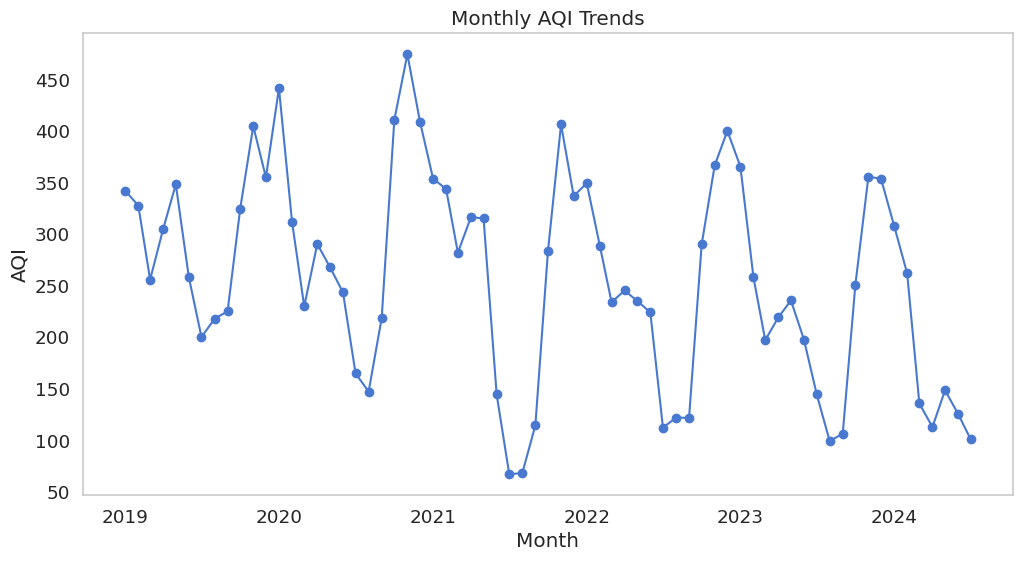

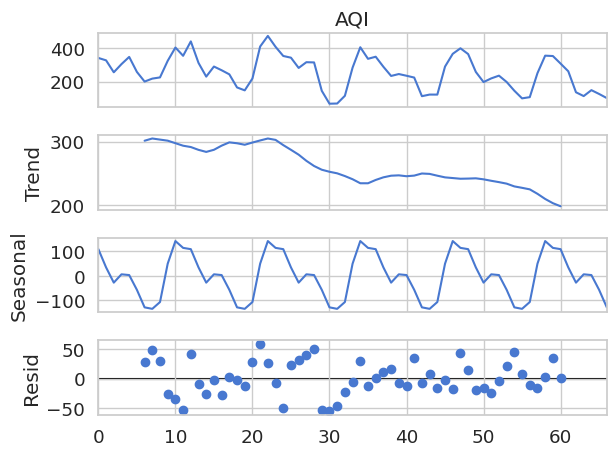

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


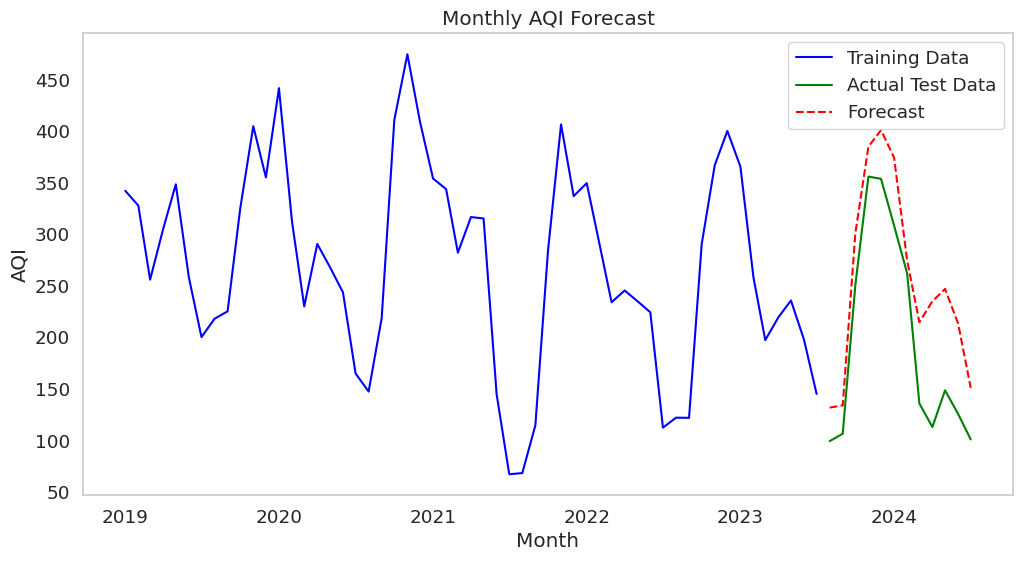

4411.209338165599

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX


data = pd.read_csv('/content/drive/MyDrive/SEM 3/SAHIL SIR/COLAB/NCR_AQI 2019_2024.csv')


data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')


data['YearMonth'] = data['Date'].dt.to_period('M')
monthly_aqi = data.groupby('YearMonth')['AQI'].mean().reset_index()
monthly_aqi['YearMonth'] = monthly_aqi['YearMonth'].dt.to_timestamp()



plt.figure(figsize=(12, 6))
plt.plot(monthly_aqi['YearMonth'], monthly_aqi['AQI'], marker='o', linestyle='-')
plt.title('Monthly AQI Trends')
plt.xlabel('Month')
plt.ylabel('AQI')
plt.grid()
plt.show()


decomposition = seasonal_decompose(monthly_aqi['AQI'], period=12, model='additive')
decomposition.plot()
plt.show()


train_data = monthly_aqi.iloc[:-12]
test_data = monthly_aqi.iloc[-12:]


sarimax_model = SARIMAX(
    train_data['AQI'],
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False,
)


sarimax_result = sarimax_model.fit(disp=False)


forecast = sarimax_result.get_forecast(steps=12)
forecast_index = test_data['YearMonth']
forecast_values = forecast.predicted_mean


plt.figure(figsize=(12, 6))
plt.plot(train_data['YearMonth'], train_data['AQI'], label='Training Data', color='blue')
plt.plot(test_data['YearMonth'], test_data['AQI'], label='Actual Test Data', color='green')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red', linestyle='--')
plt.title('Monthly AQI Forecast')
plt.xlabel('Month')
plt.ylabel('AQI')
plt.legend()
plt.grid()
plt.show()


forecast_error = ((test_data['AQI'] - forecast_values) ** 2).mean()

forecast_error


<ipython-input-22-b6892e4c7b71>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_forecast_index = pd.date_range(start=monthly_aqi['YearMonth'].iloc[-1] + pd.offsets.MonthEnd(),


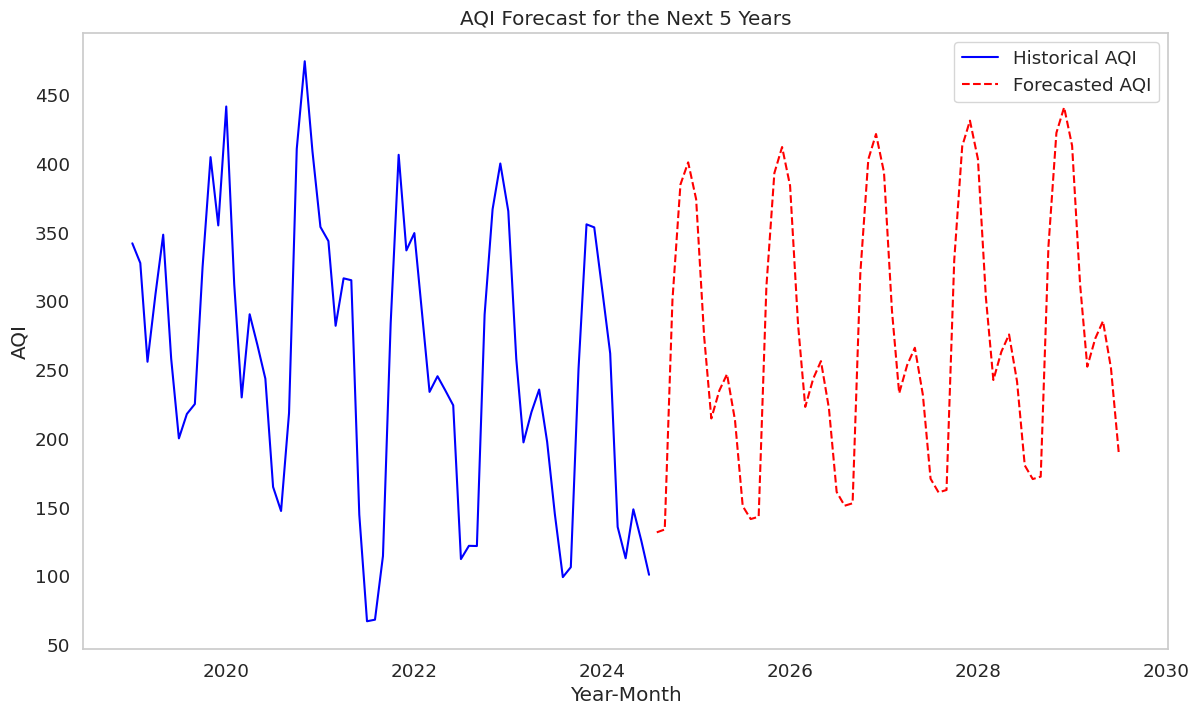

'/content/Future_AQI_Forecast_5_Years.csv'

In [ ]:
future_forecast = sarimax_result.get_forecast(steps=60)
future_forecast_index = pd.date_range(start=monthly_aqi['YearMonth'].iloc[-1] + pd.offsets.MonthEnd(),
                                      periods=60, freq='M')
future_forecast_values = future_forecast.predicted_mean


forecasted_data = pd.DataFrame({
    'YearMonth': future_forecast_index,
    'Forecasted_AQI': future_forecast_values
})


plt.figure(figsize=(14, 8))
plt.plot(monthly_aqi['YearMonth'], monthly_aqi['AQI'], label='Historical AQI', color='blue')
plt.plot(forecasted_data['YearMonth'], forecasted_data['Forecasted_AQI'], label='Forecasted AQI', color='red', linestyle='--')
plt.title('AQI Forecast for the Next 5 Years')
plt.xlabel('Year-Month')
plt.ylabel('AQI')
plt.legend()
plt.grid()
plt.show()


forecast_output_path = '/content/Future_AQI_Forecast_5_Years.csv'
forecasted_data.to_csv(forecast_output_path, index=False)

forecast_output_path
